In [29]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from numpy import array 
import os
import sys
import tarfile
from IPython.display import display, Image
from PIL import Image
from scipy import ndimage
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import matplotlib.image as mpimg
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

(1, 237, 3)
(3, 237, 1)


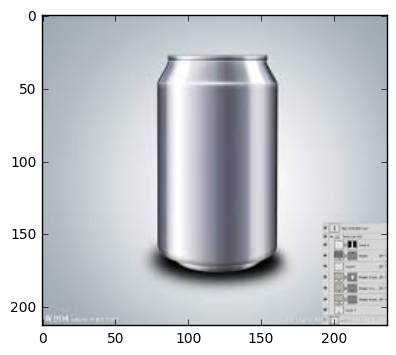

In [15]:
img=mpimg.imread('index.jpeg')
#imgplot = plt.imshow(img)
#lum_img = img[:,:,0]
#imgplot = plt.imshow(lum_img)
#plt.colorbar()
#img_2 = Image.open('stinkbug.png')
#img_2.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
imgplot = plt.imshow((img/255.).astype(np.float32))
new_img = (img/255.).astype(np.float32)
new_img = new_img[ 0:1]
print(new_img.shape)
new_img = np.transpose(new_img)
print(new_img.shape)
#print((new_img/255.).astype(np.float32))

(32, 32, 3)
32


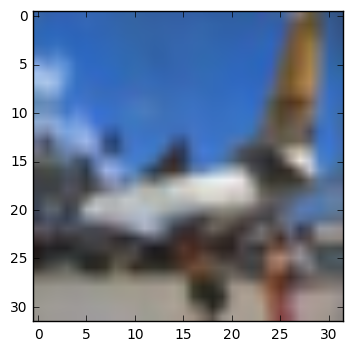

In [60]:
#img=mpimg.imread('airplane3.png')
#print(img)
#print(img.shape)

#lum_img = img[:,:, :]
#imgplot = plt.imshow(lum_img)
#img_2 = Image.open('airplane3.png')
#img_2.thumbnail((32, 32), Image.ANTIALIAS) # resizes image in-place
#imgplot = plt.imshow(img)
testdata = np.ndarray((32, 32,3), dtype=np.float32)
#print(testdata.shape)
#new_img = img.transpose(Image.ROTATE_90)
img = mpimg.imread('airplane3.png')
print(img.shape)
length = len(img)
#imgplot = plt.imshow(img)
print(length)
for i in range(length):
    testdata[ :,length-1-i, :] = img[ :,i, :]
imgplot = plt.imshow(testdata)

In [7]:
img=mpimg.imread('MDEtMDEtMDAudHRm.png')
#print(img)
#print(img.shape)
#imgplot = plt.imshow(img)

In [8]:
pickle_file = 'data_batch_1'  # index 0 should be all As, 1 = all Bs, etc.
nb_rows = 10000
image_size = 32
channle = 3
with open(pickle_file, 'rb') as f:
    dic = pickle.load(f)# unpickle
    data = dic['data']
    labels = dic['labels']
    #print(data.shape)
    # print(labels.shape)  # to change to array!
    #dataset = np.ndarray((nb_rows, image_size, image_size, channle), dtype=np.float32)
    #print(dataset.shape)
    #print(data)
    #dataset[ :,0,0,0] = 1
    #print(dataset)
    # data[0,0] is the first red pixel of first image, data[0,1024] is the first green pixel of the first image,
    # data[0,2048] is the first blue pixel of the first image. then put the three pixel value into the 
    # dataset[0,0,0, :],-------> ectract three channel of one pixel, then put it into the dataset,then loop.
    # THE SECOND way: ------> extract all the red pixel of the original array, then put it into the dataset
    # then the green and the blue. loop.
    # ####TEST####
    #R = data[0,0]
    #G = data[0,1024]
    #B = data[0,2048]
    #dataset[0,0,0,0] = R
    #dataset[0,0,0,1] = G    
    #dataset[0,0,0,2] = B
    #print(dataset[0,0,0, :])
    data_red = data[ :,0:1024]
    #print(data_red.shape)
    data_red = data_red.reshape((-1,32,32)).astype(np.float32)
    #print(data_red.shape)
    dataset[ :, :, :,0] = data_red
    #print(dataset)
    data_green = data[ :,1024:2048]
    data_green = data_green.reshape((-1,32,32)).astype(np.float32)
    dataset[ :, :, :,1] = data_green
    data_blue = data[ :,2048:3072]
    data_blue = data_blue.reshape((-1,32,32)).astype(np.float32)
    dataset[ :, :, :,2] = data_blue
    #print(dataset.shape)
    #print(dataset)
    #imgplot = plt.imshow(dataset[9999, :, :, :])
    # #this may be can used to the CNNs, all i have to do is make a new pickle file!
    
        

IOError: [Errno 2] No such file or directory: 'data_batch_1'

In [9]:
train_folders=[]
train_folders.append('train_data/data_batch_1')
train_folders.append('train_data/data_batch_2')
train_folders.append('train_data/data_batch_3')
train_folders.append('train_data/data_batch_4')
train_folders.append('train_data/data_batch_5')
test_folders =[]
test_folders.append('test_data/test_batch')
print(train_folders)
print(test_folders)
train_datasets = train_folders
test_datasets = test_folders
print(test_datasets)
string='print(os.path.join(train_datasets[0]))'
print(string)

['train_data/data_batch_1', 'train_data/data_batch_2', 'train_data/data_batch_3', 'train_data/data_batch_4', 'train_data/data_batch_5']
['test_data/test_batch']
['test_data/test_batch']
print(os.path.join(train_datasets[0]))


In [53]:
img_size = 32
image_size = 32
channle = 3
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size, channle), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for pickle_file in pickle_files:       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's not shuffle the letters to have random validation and training set!!
        # np.random.shuffle(letter_set)
        data = letter_set['data']
        #data_r = data[ :,0:1024]
        #data_g = data[ :,1024:2048]
        #data_b = data[ :,2048:3072]
        #R = np.array(data_r)
        #G = np.array(data_g)
        #B = np.array(data_b)
        #whole = (R*0.299+G*0.587+B*0.114)
        #data = whole.reshape(
        #(-1,32,32)).astype(np.float32)
        labels = letter_set['labels']
        labels_ny = np.ndarray(0, dtype=np.int32)
        #print(labels_ny.shape)
        ###  insert the processing 
        dataset_old = np.ndarray((10000, image_size, image_size, channle), dtype=np.float32)
        data_red = data[ :,0:1024]
        #print(data_red.shape)
        data_red = data_red.reshape((-1,32,32)).astype(np.float32)
        #print(data_red.shape)
        dataset_old[ :, :, :,0] = data_red
        #print(dataset)
        data_green = data[ :,1024:2048]
        data_green = data_green.reshape((-1,32,32)).astype(np.float32)
        dataset_old[ :, :, :,1] = data_green
        data_blue = data[ :,2048:3072]
        data_blue = data_blue.reshape((-1,32,32)).astype(np.float32)
        dataset_old[ :, :, :,2] = data_blue
        ### end the processing.Notice the dataset_old.shape = (10000,32,32,3)
        for label in labels:
            labels_ny = np.append(labels_ny,label)
        if valid_dataset is not None:
          valid_letter = dataset_old[:vsize_per_class, :, :, :]
          valid_dataset[start_v:end_v, :, :, :] = valid_letter
          valid_labels[start_v:end_v] = labels_ny[:vsize_per_class]
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = dataset_old[vsize_per_class:end_l, :, :, :]
        train_dataset[start_t:end_t, :, :, :] = train_letter
        train_labels[start_t:end_t] = labels_ny[vsize_per_class:end_l]
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 45000
valid_size = 5000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (45000, 32, 32, 3) (45000,)
Validation: (5000, 32, 32, 3) (5000,)
Testing: (10000, 32, 32, 3) (10000,)


In [54]:
pickle_file = 'cifar_10.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise


(45000, 32, 32, 3)
[[[  91.   74.   64.]
  [  96.   76.   67.]
  [  94.   71.   63.]
  ..., 
  [  41.   40.   37.]
  [  43.   42.   40.]
  [  41.   40.   38.]]

 [[  91.   75.   66.]
  [  91.   73.   65.]
  [  91.   70.   63.]
  ..., 
  [  45.   44.   42.]
  [  49.   48.   46.]
  [  47.   46.   44.]]

 [[  86.   73.   64.]
  [  86.   71.   63.]
  [  84.   66.   59.]
  ..., 
  [  36.   35.   34.]
  [  36.   35.   33.]
  [  31.   30.   28.]]

 ..., 
 [[  91.   76.   73.]
  [  95.   75.   74.]
  [  86.   69.   66.]
  ..., 
  [ 129.  125.  115.]
  [ 138.  125.  108.]
  [ 168.  149.  127.]]

 [[ 104.   91.   88.]
  [ 104.   86.   84.]
  [  90.   74.   71.]
  ..., 
  [ 167.  163.  153.]
  [ 174.  161.  144.]
  [ 193.  174.  151.]]

 [[  96.   85.   80.]
  [  97.   81.   78.]
  [  95.   81.   78.]
  ..., 
  [ 120.  115.  105.]
  [ 147.  134.  118.]
  [ 151.  132.  109.]]]


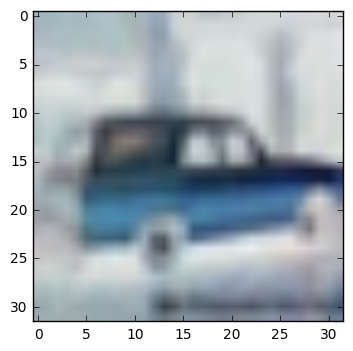

In [67]:
## test the pickle file still looks good after unpickle the file
pickle_file = 'cifar_10.pickle'
with open(pickle_file, 'rb') as f:
    dic = pickle.load(f)
    train_data = dic['train_dataset']
    train_labels = dic['train_labels']
    print(train_data.shape)
    sample_train_data = train_data[6, :, :, :]
    print(sample_train_data)
    imgplot = plt.imshow(sample_train_data)
    ## still looks not bad, better than last two pickle files
    ## hope the labels will be all right

In [5]:
## change the array to (0,1), and store the new data into a pickle file, then test the file.
pickle_file = 'cifar_10.pickle'
with open(pickle_file, 'rb') as f:
    dic = pickle.load(f)
    train_data = dic['train_dataset']
    train_labels = dic['train_labels']
    valid_data = dic['valid_dataset']
    valid_labels = dic['valid_labels']
    test_data = dic['test_dataset']
    test_labels = dic['test_labels']
#print(train_data[0,0,0, :])
train_dataset = (train_data/255).astype(np.float32)
#print(train_data[0,0,0, :])
valid_dataset = (valid_data/255).astype(np.float32)
test_dataset = (test_data/255).astype(np.float32)
## then write the new data into a pickle file 
pickle_file = 'cifar_10_01_type.pickle'
try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise


In [ ]:
## in the next move, i will desien a new CNNs, the input shape is (10000, 32, 32, 3), the input image's channle is 
# three, for every channle, will get a or more feature maps, and the kernels will all be intilizated using the 
# Gaussian distribution with 0 mean and 0.01 sted, two convolution layers  and a full connected layer.

In [92]:
pickle_file = 'cifar_10_01_type.pickle'
with open(pickle_file, 'rb') as f:
    dic = pickle.load(f)
    train_data = dic['train_dataset']
    train_labels = dic['train_labels']
    valid_data = dic['valid_dataset']
    valid_labels = dic['valid_labels']
    test_data = dic['test_dataset']
    test_labels = dic['test_labels']
#imgplot = plt.imshow(train_data[5363, :, :, :])# good
data_up_down = np.ndarray((45000,32, 32,3), dtype=np.float32)
data_90 = np.ndarray((45000,32, 32,3), dtype=np.float32)
out_length = len(train_data)
in_length = len(train_data[0, :, :, :])
for i in range(out_length):
    for j in range(in_length):
        data_up_down[i,in_length-1-j, :, :] = train_data[i,j, :, :]
for i in range(out_length):
    for j in range(in_length):
        data_90[i, :,in_length-1-j, :] = train_data[i, :,j, :]
#imgplot = plt.imshow(data_up_down[5363, :, :, :])# good!
new_train_data = np.ndarray((135000,32,32,3),dtype=np.float32)
new_train_labels = np.ndarray((135000,), dtype=np.float32)
new_train_data[0:45000, :, :, :] = train_data
new_train_data[45000:90000, :, :, :] = data_up_down
new_train_data[90000:135000, :, :, :] = data_90
new_train_labels[0:45000,] = train_labels
new_train_labels[45000:90000,] = train_labels
new_train_labels[90000:135000,] = train_labels
pickle_file = 'cifar_10_04_type.pickle'
try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': new_train_data,
    'train_labels': new_train_labels,
    'valid_dataset': valid_data,
    'valid_labels': valid_labels,
    'test_dataset': test_data,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
#data_and_label = np.ndarray((90000,32,32,3,1),dtype=np.float32)
#ength = len(data_and_label)
#new_train_data = new_train_data.reshape((-1,32,32,3,1)).astype(np.float32)
#print(new_train_data.shape)
# put the data and the label into one array, and make the shuffle to make sure the data is good #

In [21]:
# some test on he new pickle file

pickle_file = 'cifar_10_01_type.pickle'
with open(pickle_file, 'rb') as f:
    dic = pickle.load(f)
    train_data = dic['train_dataset']
    train_labels = dic['train_labels']
    valid_data = dic['valid_dataset']
    valid_labels = dic['valid_labels']
    test_data = dic['test_dataset']
    test_labels = dic['test_labels']
    #print(test_labels.shape)
    #a = 2
    #sample_train_data = train_data[8888, a:a+23, a:a+23, :]
    #print(sample_train_data.shape)
    #imgplot = plt.imshow(sample_train_data)
image_size = 24
channle = 3
new_dataset_train = np.ndarray((90000, image_size, image_size, channle), dtype=np.float32)
new_labels_train = np.ndarray((90000,), dtype=np.float32)
# not use the random in the first! for example: 4:28
test_data = test_data[ :,4:28,4:28, :]
valid_data = valid_data[ :,4:28,4:28, :]
new_dataset_train[0:45000, :, :, :]=train_data[ :,0:24,0:24, :]
new_dataset_train[45000:90000, :, :, :]=train_data[ :,8:32,8:32, :]
new_labels_train[0:45000,] = train_labels
new_labels_train[45000:90000,] = train_labels
#imgplot = plt.imshow(new_dataset_train[66666, :, :, :])
#print(test_data.shape)
# store the new dataset into a new pickle file!
pickle_file = 'cifar_10_02_type.pickle'
try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': new_dataset_train,
    'train_labels': new_labels_train,
    'valid_dataset': valid_data,
    'valid_labels': valid_labels,
    'test_dataset': test_data,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [ ]:
## damn! look at that! that is the right way to show the picture! 

In [ ]:
## augumentation on the dataset!!
